# House Price Prediction - Assignment Solution

The solution is divided into the following sections:

    Data understanding and exploration
    Data cleaning
    Data preparation
    Model building and evaluation



1. Data Understanding and Exploration

Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.


In [678]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.metrics import mean_squared_error,r2_score
%matplotlib inline

In [679]:
import warnings
warnings.filterwarnings('ignore')

In [680]:
# Reading the dataset
df = pd.read_csv("train.csv", na_values="NAN")

In [681]:
# Let's take a look at the first few rows
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [682]:
print(df.shape)

(1460, 81)


In [683]:
#Auto EDA
import sweetviz as sv
sweet_report = sv.analyze(df,pairwise_analysis="off")
sweet_report.show_html('sweet_report.html')

                                             |     | [  0%]   00:00 -> (? left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#sweet_report.html provide details analysis of categorical variables ((Not Null Values Count, Missing Values count, Distinct value count)
and Numeric variables (Not Null Values Count, Missing Values count, Distinct value count, Max, Min, Median,Avg..)

In [684]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [685]:
# Summary of the dataset : 1460 rows, 81 columns and some columns have NULL values as well

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

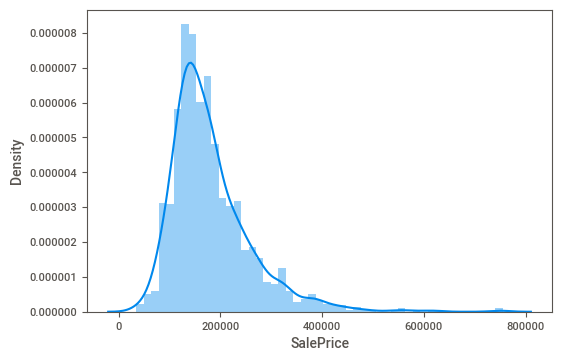

In [686]:
sns.distplot(df['SalePrice'])

In [687]:
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [688]:
#Skewness value shows it is positive distibution

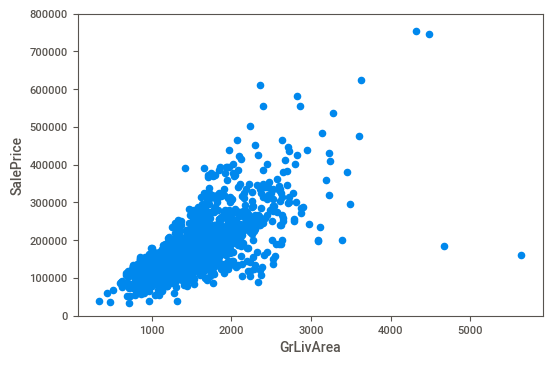

In [689]:
var = 'GrLivArea'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [690]:
## Salesprice have strongly corelated to GrLivArea

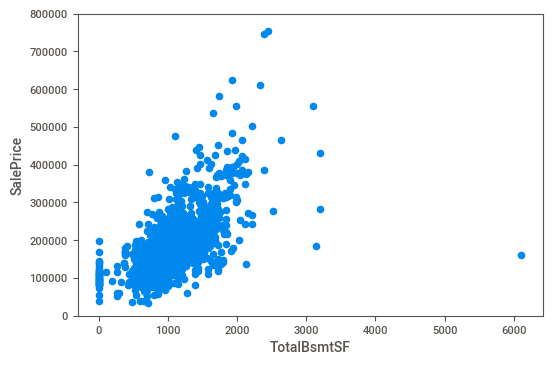

In [691]:
var = 'TotalBsmtSF'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

<AxesSubplot:xlabel='SalePrice'>

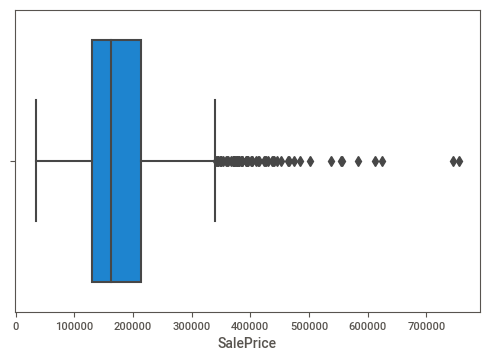

In [692]:
sns.boxplot(data['SalePrice'])

#Checking saleprice outliers and it is observed that median of saleprice between 100K to 200k

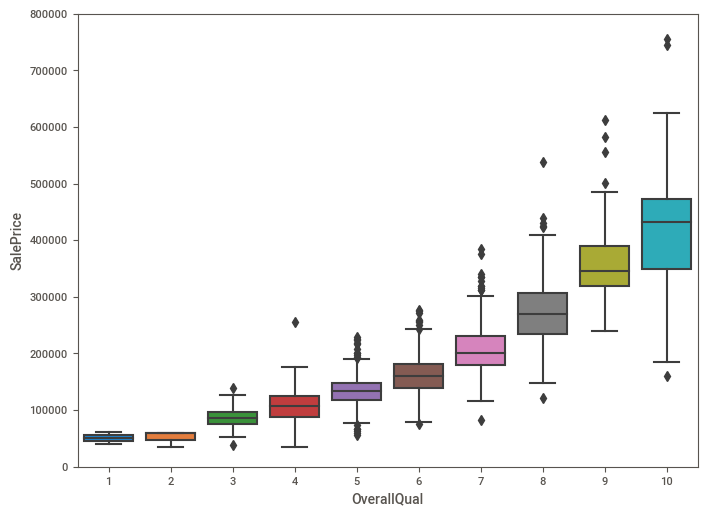

In [693]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

#As overall Quality increases the price and Price range also Increases

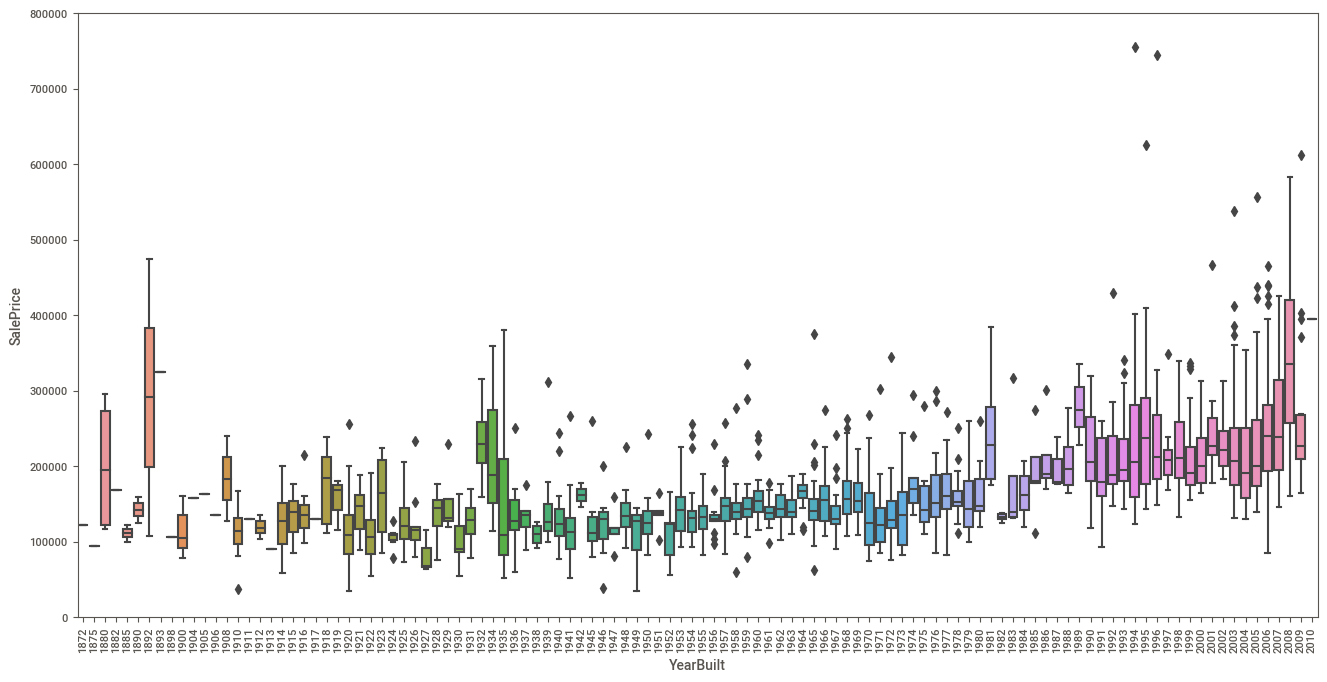

In [694]:
var = 'YearBuilt'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);


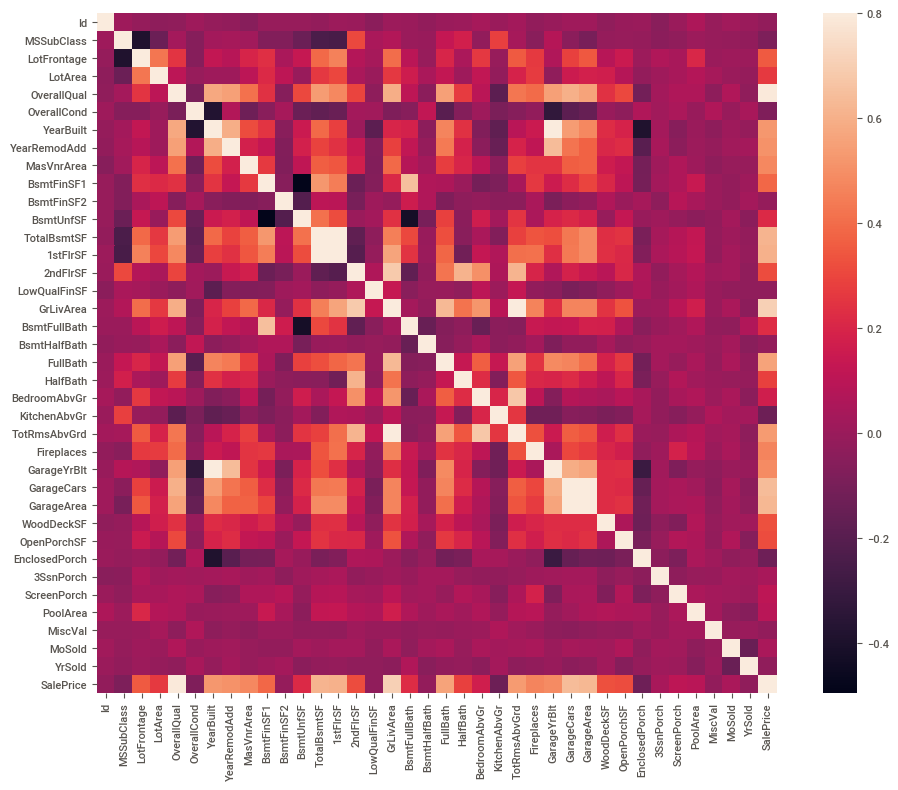

In [695]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

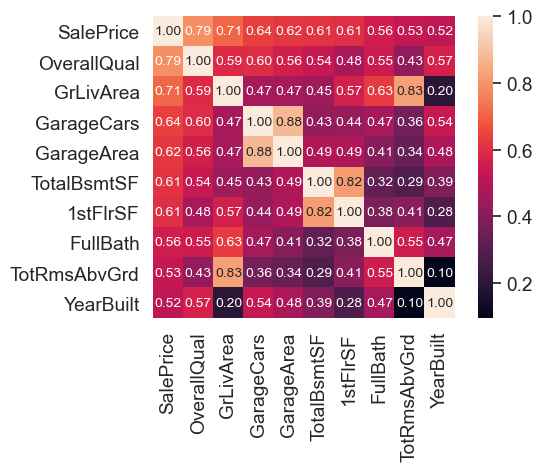

In [696]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

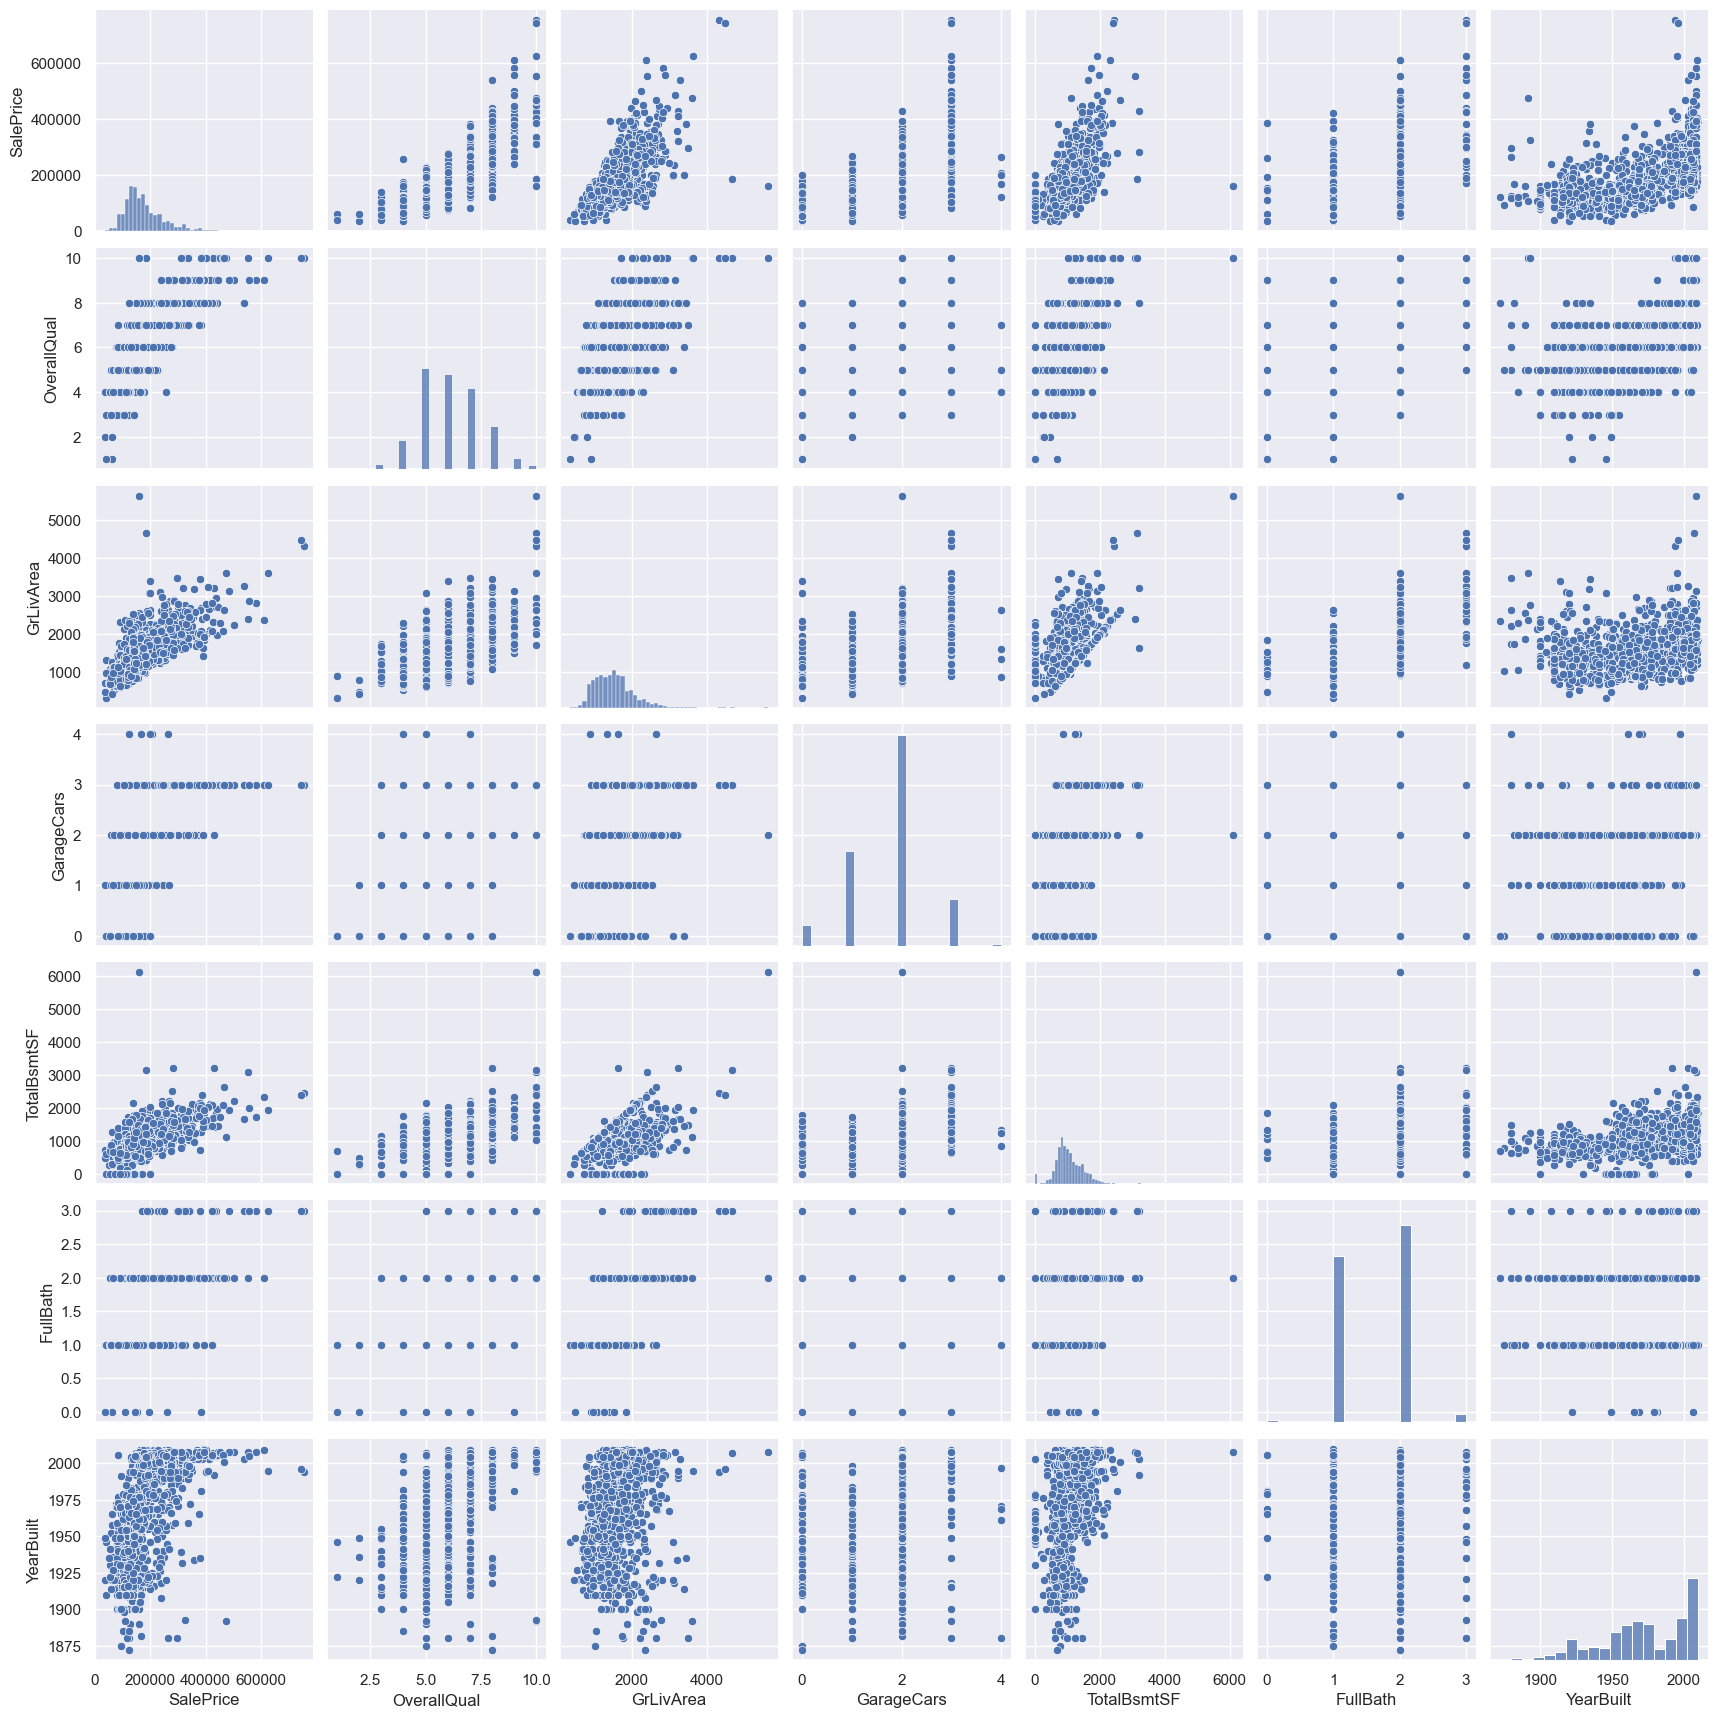

In [697]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show();

2. Data Cleaning
#Missing data

Check for Missing data column.

In [698]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


#Imputing Null Values

For numerical imputing, we would typically fill the missing values with a measure like median, mean, or mode. 
For categorical imputing, I chose to fill the missing values with the most common term that appeared from the entire column. 

#Places Where NaN Means Something

If you look at the data description file provided, you will see that for some categories, NA actually means something. This means that if a value is NA, the house might not have that certain attribute, which will affect the price of the house. 
Therefore, it is better to not drop, but fill in the null cell with a value called "None" which serves as its own category.


In [699]:
#you can find these features on the description data file provided

null_has_meaning = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [700]:
for i in null_has_meaning:
    df[i].fillna("None", inplace=True)
    df[i].fillna("None", inplace=True)

In [701]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#Imputing "Real" NaN Values

These are the real NaN values that we have to deal with accordingly because they were not recorded.


In [702]:
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy="median")

In [703]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
Electrical,1,0.000685
KitchenQual,0,0.000000


LotFrontage has too many Null values and it is a numerical value so it may be better to just drop it.


In [704]:
df.drop("LotFrontage", axis=1, inplace=True)

In [705]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
GarageYrBlt,81,0.055479
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
Electrical,1,0.000685
KitchenQual,0,0.000000


GarageYrBlt, MasVnrArea, and MasVnrType all have a fairly decent amount of missing values. MasVnrType is categorical so we can replace the missing values with "None", as we did before. We can fill the others with median.

In [706]:
df["GarageYrBlt"].fillna(df["GarageYrBlt"].median(), inplace=True)
df["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace=True)
df["MasVnrType"].fillna("None", inplace=True)

#Now again Check The Missing data

In [707]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Electrical,1,0.000685
MSSubClass,0,0.000000
GarageYrBlt,0,0.000000
GarageType,0,0.000000
FireplaceQu,0,0.000000


Now that only one row has a null entry, we will drop the row.


In [708]:
df.dropna(inplace=True)

In [709]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Id,0,0.0
MSSubClass,0,0.0
GarageYrBlt,0,0.0
GarageType,0,0.0
FireplaceQu,0,0.0


#There is no missing values

In [710]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [711]:
print(df.shape)

(1459, 80)


Now we can do Auto EDA and check the data Quality
Now Totals records for Final model is 1459 rows and 80 columns

In [712]:
#Auto EDA
import sweetviz as sv
sweet_report = sv.analyze(df,pairwise_analysis="off")
sweet_report.show_html('sweet_report.html')

                                             |     | [  0%]   00:00 -> (? left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Now we will determine the data type of all features remaining

In [713]:
types_train = df.dtypes #type of each feature in data: int, float, object
num_train = types_train[(types_train == 'int64') | (types_train == float)] #numerical values are either type int or float
cat_train = types_train[types_train == object] #categorical values are type object

In [714]:
pd.DataFrame(types_train).reset_index().set_index(0).reset_index()[0].value_counts()

object     43
int64      35
float64     2
Name: 0, dtype: int64

In [715]:
#we should convert num_train to a list to make it easier to work with
numerical_values_train = list(num_train.index)

In [716]:
print(numerical_values_train)

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


These are all the numerical features in our data.

In [717]:
categorical_values_train = list(cat_train.index)
print(categorical_values_train)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


These are all the caregorical features in our data.


3. Data Preparation

In 1st stage we have fixed the mising values in Data set .In 2nd stage we will convert the categorical values into representative numbers. After this we will data will be fed into our model as training data


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

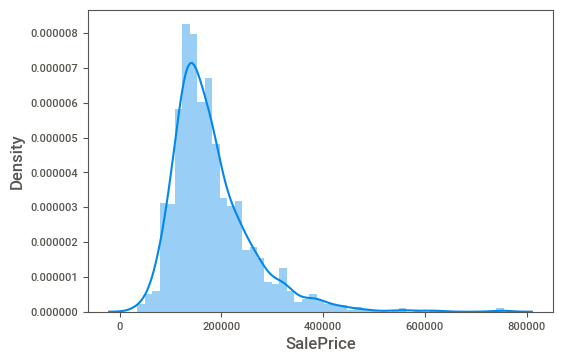

In [718]:
sns.distplot(df["SalePrice"])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

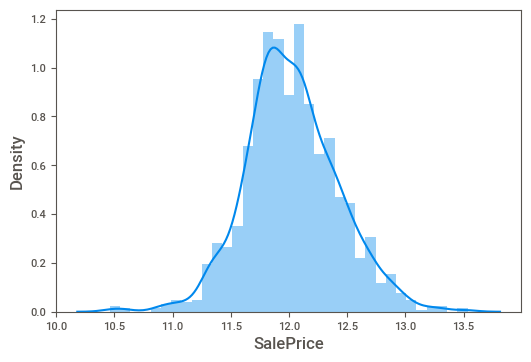

In [719]:
sns.distplot(np.log(df["SalePrice"]))

It appears that the target, SalePrice, is very skewed and a transformation like a logarithm would make it more normally distributed. Machine Learning models tend to work much better with normally distributed targets, rather than greatly skewed targets. By transforming the prices, we can boost model performance.


In [720]:
df["TransformedPrice"] = np.log(df["SalePrice"])

In [721]:
print(categorical_values_train)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [722]:
for i in categorical_values_train:
    feature_set = set(df[i])
    for j in feature_set:
        feature_list = list(feature_set)
        df.loc[df[i] == j, i] = feature_list.index(j)

In [723]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TransformedPrice
0,1,60,0,8450,1,1,0,0,1,3,...,1,4,4,0,2,2008,4,5,208500,12.247694
1,2,20,0,9600,1,1,0,0,1,4,...,1,4,4,0,5,2007,4,5,181500,12.109011
2,3,60,0,11250,1,1,3,0,1,3,...,1,4,4,0,9,2008,4,5,223500,12.317167
3,4,70,0,9550,1,1,3,0,1,0,...,1,4,4,0,2,2006,4,0,140000,11.849398
4,5,60,0,14260,1,1,3,0,1,4,...,1,4,4,0,12,2008,4,5,250000,12.429216


It seems like we have changed all the categorical strings into a representative number. We are ready to build our models!

#Model Building

Now that we've preprocessed and explored our data, we have a much better understanding of the type of data that we're dealing with. Now, we can began to build and test different models for regression to predict the Sale Price of each house.


In [724]:
X = df.drop(["Id", "SalePrice", "TransformedPrice"], axis=1)
y = df["TransformedPrice"]

In [725]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=42)

In [726]:
print(X_train.shape)
print(X_test.shape)

(1021, 78)
(438, 78)


In [727]:
# This Dataset will be used for Model-1

In [728]:
#Unregularized Model
# Applying Linear Regression
from sklearn.linear_model import LinearRegression,Lasso, Ridge
lr = LinearRegression()
lr.fit(X_train,y_train)
print("Training R2")
print(lr.score(X_train,y_train))
print("Testing R2")
print(lr.score(X_test,y_test))

Training R2
0.8855018523058992
Testing R2
0.8700760144114322


In [729]:
print(lr.intercept_)
print(lr.coef_)

14.764923633153447
[-9.67527139e-04 -1.42146184e-02  1.01538918e-06  8.11760185e-02
  3.46159769e-02  3.75795765e-03 -1.54251891e-02  2.57903251e-01
 -2.20510683e-03  1.27042367e-02  6.30019717e-03 -1.27172792e-03
  5.14762576e-02 -2.09154474e-02  1.78899297e-03  6.26512045e-02
  4.76546230e-02  2.59865202e-03  7.82806166e-04  3.68569299e-03
  1.31155637e-02  3.66957912e-03 -1.69570918e-03  2.83134878e-03
 -9.07007914e-07  5.91746151e-03 -7.84325319e-03  3.06624723e-03
 -2.97661709e-03 -1.76009543e-03  1.07240122e-02 -7.75126793e-03
  4.40926251e-06 -1.47264766e-02  4.25975106e-05 -4.03395933e-05
  6.66717588e-06 -1.05311144e-02  1.46042036e-03  6.26007074e-02
 -1.61035850e-03  8.19737532e-05  2.27547387e-05  3.75716593e-05
  1.42300149e-04  4.55382664e-02  1.40509605e-02  3.56598852e-02
  1.79590438e-02 -2.68724370e-03 -7.44546900e-02  7.98810213e-04
  3.00458233e-02  1.29403817e-02  3.74951396e-02  3.73040438e-03
 -1.50861503e-02 -3.53020191e-04 -6.95505073e-03  6.51780779e-02
  6.25

In [730]:
y_train_pred=lr.predict(X_train)
metric=[]
r2_train_lr=r2_score(y_train, y_train_pred)
print(r2_train_lr)
metric.append(r2_train_lr)

y_test_pred=lr.predict(X_test)
r2_test_lr=r2_score(y_test, y_test_pred)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr=np.sum(np.square(y_train-y_train_pred))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr=np.sum(np.square(y_test-y_test_pred))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr=mean_squared_error(y_train, y_train_pred)
print(mse_train_lr)
metric.append(mse_train_lr)

mse_test_lr=mean_squared_error(y_test, y_test_pred)
print(mse_test_lr)
metric.append(mse_test_lr)

0.8855018523058992
0.8700760144114322
17.83428471173976
10.004423110154008
0.01746746788613101
0.022841148653319654


In [731]:
# We will Test Four models:

# 1) Model-1 --Applying Ridge Lasso (Model1) On FULL Data Set

# 2) Model-2 --Applying Ridge Lasso (Model2) On New Data set (i.e. Full data set  - (lasso.coef_=0.0)) with New Params

# 3) Model-3  (Double the Alpha Values for Both Ridge and Lasso)(Model-3)

# 4) Model-4 --Applying Ridge Lasso (Model4) on New Data set After removing five most Important variables

In [732]:
# Applying Ridge Lasso (Model1)
# Importing the relevant libraries
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [733]:
# Applying Ridge (Model 1)
#If alpha=0 then overfitting [Unregularised Model]
#Higher the alpha more the regularization more the underfitting
#Lower the alpha lesser the regularization more the overfitting
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2',#'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [734]:
#Ridge (Model 1)
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011000,2.097716e-03,0.004600,3.200069e-03,0.0001,{'alpha': 0.0001},0.880312,0.513245,0.874963,0.896792,...,0.568576,0.468131,24,0.882159,0.921544,0.883930,0.880599,0.907667,0.895180,0.016491
1,0.013001,2.828677e-03,0.004800,3.999472e-04,0.001,{'alpha': 0.001},0.880314,0.513260,0.874965,0.896791,...,0.568577,0.468136,23,0.882159,0.921544,0.883930,0.880599,0.907667,0.895180,0.016491
2,0.017001,6.356479e-03,0.005000,1.549389e-03,0.01,{'alpha': 0.01},0.880327,0.513412,0.874989,0.896777,...,0.568581,0.468195,22,0.882159,0.921544,0.883930,0.880599,0.907667,0.895180,0.016491
3,0.010601,4.899598e-04,0.004800,4.001141e-04,0.05,{'alpha': 0.05},0.880384,0.514078,0.875087,0.896717,...,0.568602,0.468442,21,0.882157,0.921544,0.883927,0.880597,0.907667,0.895178,0.016492
4,0.010601,8.001328e-04,0.004800,7.483410e-04,0.1,{'alpha': 0.1},0.880450,0.514883,0.875199,0.896648,...,0.568634,0.468723,20,0.882150,0.921543,0.883918,0.880593,0.907665,0.895174,0.016494
5,0.009801,4.001617e-04,0.004200,4.000187e-04,0.2,{'alpha': 0.2},0.880567,0.516410,0.875390,0.896524,...,0.568714,0.469212,19,0.882127,0.921540,0.883890,0.880578,0.907661,0.895159,0.016503
6,0.011401,1.019833e-03,0.004600,4.899792e-04,0.3,{'alpha': 0.3},0.880669,0.517834,0.875549,0.896415,...,0.568805,0.469627,18,0.882095,0.921536,0.883853,0.880557,0.907655,0.895139,0.016514
7,0.020201,1.225466e-02,0.005400,1.496765e-03,0.4,{'alpha': 0.4},0.880759,0.519167,0.875683,0.896319,...,0.568903,0.469984,17,0.882058,0.921531,0.883810,0.880533,0.907649,0.895116,0.016528
8,0.012201,2.482143e-03,0.005000,1.168008e-07,0.5,{'alpha': 0.5},0.880839,0.520416,0.875798,0.896233,...,0.569003,0.470298,16,0.882017,0.921526,0.883763,0.880505,0.907642,0.895091,0.016543
9,0.009401,4.899793e-04,0.004600,4.899793e-04,0.6,{'alpha': 0.6},0.880912,0.521589,0.875897,0.896155,...,0.569104,0.470577,15,0.881974,0.921519,0.883714,0.880475,0.907636,0.895064,0.016559


In [735]:
#Ridge (Model 1)
print(model_cv.best_params_)

{'alpha': 7.0}


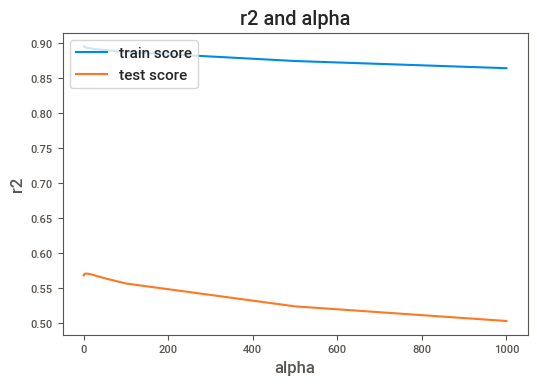

In [736]:
#Ridge (Model 1)
#lets plot mean test and mean train score with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.plot(cv_results["param_alpha"],cv_results["mean_train_score"])
plt.plot(cv_results["param_alpha"],cv_results["mean_test_score"])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [737]:
#Ridge (Model 1)
alpha = 7.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.03900403e-03, -1.52652741e-02,  9.72401575e-07,  2.58889703e-02,
        3.06189800e-02,  3.63970042e-03, -1.62965708e-02,  2.92105594e-02,
       -2.10871398e-03,  1.33067895e-02,  6.31275733e-03, -2.40882273e-04,
        4.60092115e-02, -2.19644576e-02,  2.05838938e-03,  6.48066518e-02,
        4.47554451e-02,  2.67129878e-03,  9.50900968e-04,  4.08806451e-03,
        4.72487012e-03,  3.74462063e-03, -1.47610228e-03,  1.67121958e-03,
       -9.29116829e-06,  5.63553312e-03, -6.12025743e-03,  2.72844035e-03,
       -3.06963591e-03, -1.31879017e-03,  1.04467751e-02, -7.74792185e-03,
        3.92637573e-06, -1.38177676e-02,  4.13114022e-05, -3.96108021e-05,
        5.62698795e-06, -9.73360274e-03,  1.77174696e-03,  5.84531057e-02,
        3.17813297e-04,  5.36697230e-05,  8.03030262e-06,  1.01351869e-04,
        1.63051910e-04,  4.60301421e-02,  1.67088350e-02,  3.50838922e-02,
        1.68917955e-02, -1.88481541e-03, -5.51582130e-02,  6.43986853e-04,
        2.78794677e-02,  

In [738]:
#Ridge (Model 1)
y_train_pred=ridge.predict(X_train)
metric2=[]
r2_train_lr=r2_score(y_train, y_train_pred)
print(r2_train_lr)
metric2.append(r2_train_lr)

y_test_pred=ridge.predict(X_test)
r2_test_lr=r2_score(y_test, y_test_pred)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr=np.sum(np.square(y_train-y_train_pred))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr=np.sum(np.square(y_test-y_test_pred))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr=mean_squared_error(y_train, y_train_pred)
print(mse_train_lr)
metric2.append(mse_train_lr)

mse_test_lr=mean_squared_error(y_test, y_test_pred)
print(mse_test_lr)
metric2.append(mse_test_lr)

0.8835562162156638
0.8718388013647319
18.137337893625276
9.868684767045323
0.017764287848800468
0.02253124376037745


In [739]:
#Ridge (Model 1)
# Ridge model parameters
model_parameters = list(sorted(ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 15.661),
 ('MSSubClass', -0.142),
 ('MSZoning', -0.055),
 ('LotArea', -0.022),
 ('Street', -0.016),
 ('Alley', -0.016),
 ('LotShape', -0.015),
 ('LandContour', -0.014),
 ('Utilities', -0.01),
 ('LotConfig', -0.008),
 ('LandSlope', -0.006),
 ('Neighborhood', -0.006),
 ('Condition1', -0.006),
 ('Condition2', -0.003),
 ('BldgType', -0.002),
 ('HouseStyle', -0.002),
 ('OverallQual', -0.001),
 ('OverallCond', -0.001),
 ('YearBuilt', -0.001),
 ('YearRemodAdd', -0.0),
 ('RoofStyle', -0.0),
 ('RoofMatl', -0.0),
 ('Exterior1st', -0.0),
 ('Exterior2nd', -0.0),
 ('MasVnrType', -0.0),
 ('MasVnrArea', 0.0),
 ('ExterQual', 0.0),
 ('ExterCond', 0.0),
 ('Foundation', 0.0),
 ('BsmtQual', 0.0),
 ('BsmtCond', 0.0),
 ('BsmtExposure', 0.0),
 ('BsmtFinType1', 0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinType2', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('Heating', 0.0),
 ('HeatingQC', 0.0),
 ('CentralAir', 0.0),
 ('Electrical', 0.001),
 ('1stFlrSF', 0.001),
 ('2ndFlrSF'

In [740]:
#Ridge (Model1)
# Top 5 Variable using ridge
model_parameters = list((ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
coef_list=list((zip(cols, model_parameters)))
coef_df=pd.DataFrame(coef_list,columns=["Features","Values"])
top5ridge=coef_df.loc[coef_df["Values"]>=0.046]
top5ridge.sort_values(by="Values",ascending=False)

,Features,Values
0,constant,15.661
16,OverallQual,0.065
60,GarageCars,0.061
40,CentralAir,0.058
13,Condition2,0.046
46,BsmtFullBath,0.046


In [741]:
# Applying Lasso (Model 1)
#If alpha=0 then overfitting [Unregularised Model]
#Higher the alpha more the regularization more the underfitting
#Lower the alpha lesser the regularization more the overfitting
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [742]:
#Lasso (Model 1)
print(model_cv.best_params_)

{'alpha': 0.001}


In [743]:
#Lasso (Model 1)
cv_result=pd.DataFrame(model_cv.cv_results_)
cv_result[["param_alpha","mean_test_score","mean_train_score"]]

,param_alpha,mean_test_score,mean_train_score
0,0.0001,-0.109005,-0.088537
1,0.001,-0.107926,-0.088638
2,0.01,-0.108055,-0.091859
3,0.05,-0.123407,-0.107851
4,0.1,-0.127543,-0.112320
5,0.2,-0.127586,-0.113165
6,0.3,-0.128506,-0.114778
7,0.4,-0.129465,-0.116742
8,0.5,-0.129611,-0.117716
9,0.6,-0.129646,-0.118727


In [744]:
#Lasso (Model 1)
alpha = .001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-9.42487844e-04, -1.55647862e-02,  1.04840304e-06,  0.00000000e+00,
        1.66408249e-02,  3.13640215e-03, -1.22969564e-02,  0.00000000e+00,
       -1.49469846e-03,  6.84048736e-03,  6.45314979e-03, -0.00000000e+00,
        3.04255749e-02, -1.66856287e-02,  1.63047223e-03,  6.60502393e-02,
        4.38200462e-02,  2.80278634e-03,  1.09846621e-03,  3.81235651e-03,
        0.00000000e+00,  3.75524230e-03, -1.42550253e-03,  0.00000000e+00,
       -1.54579174e-05,  3.68354149e-03, -3.69684632e-03,  7.66360738e-04,
       -1.48043468e-03, -0.00000000e+00,  9.09823070e-03, -7.43678943e-03,
        3.01330689e-05, -1.32176505e-02,  6.85008783e-05, -2.20290202e-05,
       -4.91168047e-06, -0.00000000e+00,  8.41501269e-04,  4.50639560e-02,
        0.00000000e+00,  1.91499036e-04,  1.57733815e-04,  2.45023214e-04,
        2.78460284e-05,  3.63647772e-02,  0.00000000e+00,  2.21605869e-02,
        6.97383812e-03, -0.00000000e+00, -2.83811299e-02,  3.96502191e-04,
        2.42249806e-02,  

In [745]:
#Lasso (Model 1)
y_train_pred=lasso.predict(X_train)
metric3=[]
r2_train_lr=r2_score(y_train, y_train_pred)
print(r2_train_lr)
metric3.append(r2_train_lr)

y_test_pred=lasso.predict(X_test)
r2_test_lr=r2_score(y_test, y_test_pred)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr=np.sum(np.square(y_train-y_train_pred))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr=np.sum(np.square(y_test-y_test_pred))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr=mean_squared_error(y_train, y_train_pred)
print(mse_train_lr)
metric3.append(mse_train_lr)

mse_test_lr=mean_squared_error(y_test, y_test_pred)
print(mse_test_lr)
metric3.append(mse_test_lr)

0.882025600811592
0.8756393587927297
18.375747260502717
9.576033765062247
0.01799779359500756
0.02186309078781335


In [746]:
#Lasso (Model 1)
# Top 5 Variable using Lasso
model_parameters = list((lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
coef_list=list((zip(cols, model_parameters)))
coef_df=pd.DataFrame(coef_list,columns=["Features","Values"])
top5lasso=coef_df.loc[coef_df["Values"]>=0.037]
top5lasso.sort_values(by="Values",ascending=False)

,Features,Values
0,constant,14.703
16,OverallQual,0.066
60,GarageCars,0.058
40,CentralAir,0.045
17,OverallCond,0.044
55,Fireplaces,0.037


In [747]:
#Summary of Linear Regression, Ridge Lasso (Model 1)
lr_table={'Metric':['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)'
                    ,'MSE (Train)','MSE (Test)'], 'Linear Regression':metric}

lr_metric=pd.DataFrame(lr_table,columns=['Metric','Linear Regression'])

rg_metric=pd.DataFrame(metric2,columns=['Ridge Regression'])
ls_metric=pd.DataFrame(metric3,columns=['Lasso Regression'])

final_metric=pd.concat([lr_metric,rg_metric,ls_metric],axis=1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.885502,0.883556,0.882026
1,R2 Score (Test),0.870076,0.871839,0.875639
2,RSS (Train),17.834285,18.137338,18.375747
3,RSS (Test),10.004423,9.868685,9.576034
4,MSE (Train),0.017467,0.017764,0.017998
5,MSE (Test),0.022841,0.022531,0.021863


In [748]:
# Selecting and dropping the columns which have ["Coeficient"]==0.0 in Lasso Model

Feature selection Using lasso

In [749]:
model_parameters = list((lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
coef_list=list((zip(cols, model_parameters)))

Coef_df=pd.DataFrame(coef_list,columns=["feature","Coeficient"])

Zero_coef_feature=Coef_df.loc[Coef_df["Coeficient"]==0.0]

features_need_del=list(Zero_coef_feature["feature"])
len(features_need_del)

32

In [750]:
X_train=X_train.drop(features_need_del,axis=1)
X_test=X_test.drop(features_need_del,axis=1)

In [751]:
print(X_train.shape)
print(X_test.shape)

(1021, 46)
(438, 46)


In [752]:
#This Dataset will be used for Model-2

In [753]:
X_train.head()

,MSSubClass,MSZoning,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition2,BldgType,...,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,MoSold,YrSold,SaleType,SaleCondition
135,20,0,1,0,0,3,0,3,3,4,...,2,2,1,1,2,1,5,2008,4,5
1452,180,3,1,0,0,3,0,8,3,1,...,1,2,1,1,2,1,5,2006,4,5
1046,60,0,1,3,0,3,0,16,3,4,...,1,3,1,1,2,1,7,2006,3,2
691,60,0,1,3,0,0,0,13,3,4,...,1,3,1,1,2,1,1,2007,4,5
435,60,0,1,1,0,2,0,11,3,4,...,0,2,1,1,2,1,4,2009,8,5


In [754]:
# Applying Ridge Lasso (Model2) On New Data set (i.e. Full data set  - (lasso.coef_=0.0))
# Let's change the params parameters and Test Ridge and Lasso 

# Importing the relevant libraries
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
  0.3, 0.5, 0.7, 1.0, 3.0, 
  5.0,  7.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [755]:
# Applying Ridge (Model2)
#If alpha=0 then overfitting [Unregularised Model]
#Higher the alpha more the regularization more the underfitting
#Lower the alpha lesser the regularization more the overfitting
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2',#'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.3, 0.5,
                                   0.7, 1.0, 3.0, 5.0, 7.0, 10.0, 20, 50, 100,
                                   500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [756]:
#Ridge (Model2)
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006600,0.003666,0.0058,4.489927e-03,0.0001,{'alpha': 0.0001},0.851878,0.777669,0.857532,0.860393,...,0.814520,0.054219,16,0.863067,0.874374,0.862418,0.862815,0.875639,0.867663,0.006013
1,0.007000,0.001096,0.0040,1.784161e-07,0.001,{'alpha': 0.001},0.851879,0.777670,0.857532,0.860393,...,0.814531,0.054203,15,0.863067,0.874374,0.862418,0.862815,0.875639,0.867663,0.006013
2,0.007201,0.001166,0.0060,4.516910e-03,0.01,{'alpha': 0.01},0.851881,0.777689,0.857533,0.860394,...,0.814632,0.054041,14,0.863067,0.874374,0.862418,0.862815,0.875639,0.867663,0.006013
3,0.006400,0.000490,0.0032,3.999949e-04,0.05,{'alpha': 0.05},0.851894,0.777770,0.857536,0.860402,...,0.815077,0.053339,13,0.863067,0.874374,0.862418,0.862815,0.875637,0.867662,0.006013
4,0.006800,0.000400,0.0032,4.000664e-04,0.1,{'alpha': 0.1},0.851909,0.777870,0.857541,0.860411,...,0.815613,0.052497,12,0.863066,0.874374,0.862418,0.862814,0.875631,0.867661,0.006011
5,0.007601,0.000490,0.0036,4.899598e-04,0.3,{'alpha': 0.3},0.851970,0.778253,0.857557,0.860448,...,0.817567,0.049488,11,0.863062,0.874373,0.862413,0.862810,0.875574,0.867647,0.005998
6,0.006400,0.000490,0.0034,4.899014e-04,0.5,{'alpha': 0.5},0.852029,0.778615,0.857572,0.860483,...,0.819257,0.046968,10,0.863054,0.874372,0.862405,0.862803,0.875475,0.867622,0.005976
7,0.006600,0.000490,0.0034,4.899014e-04,0.7,{'alpha': 0.7},0.852086,0.778956,0.857584,0.860517,...,0.820732,0.044842,9,0.863043,0.874370,0.862394,0.862792,0.875347,0.867589,0.005947
8,0.007000,0.001095,0.0032,3.999710e-04,1.0,{'alpha': 1.0},0.852171,0.779433,0.857599,0.860566,...,0.822616,0.042236,8,0.863020,0.874366,0.862371,0.862771,0.875118,0.867529,0.005898
9,0.006600,0.000490,0.0034,7.999659e-04,3.0,{'alpha': 3.0},0.852670,0.781873,0.857613,0.860834,...,0.829664,0.033896,7,0.862765,0.874313,0.862113,0.862530,0.873331,0.867011,0.005574


In [757]:
#Ridge (Model2)
print(model_cv.best_params_)

{'alpha': 50}


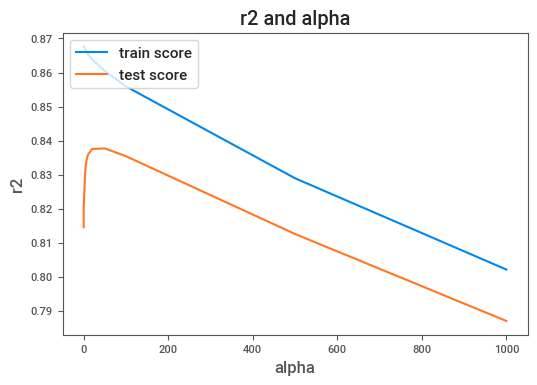

In [758]:
#Ridge (Model2)
#lets plot mean test and mean train score with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.plot(cv_results["param_alpha"],cv_results["mean_train_score"])
plt.plot(cv_results["param_alpha"],cv_results["mean_test_score"])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [759]:
#Ridge (Model2)
alpha = 50.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.0009937 , -0.01689842,  0.01898332,  0.00633517, -0.0136621 ,
       -0.00545364,  0.02377126,  0.00628168,  0.0120071 , -0.01746525,
        0.00692235,  0.08587002,  0.03983509,  0.00168886,  0.00134414,
        0.00814057,  0.004862  , -0.00276465,  0.00706954, -0.00104416,
       -0.00081521, -0.00209103,  0.02003899, -0.00724005, -0.00833151,
        0.00410936,  0.03460809,  0.06992457,  0.05147851,  0.0369476 ,
       -0.03327896,  0.05889289,  0.00618868,  0.05962083, -0.00177787,
       -0.01552749, -0.01281797,  0.07696831,  0.00735486,  0.00133115,
        0.02669772, -0.03335305,  0.00255074, -0.00444218,  0.00303453,
        0.00385621])

In [760]:
#Ridge (Model2)
y_train_pred=ridge.predict(X_train)
metric2=[]
r2_train_lr=r2_score(y_train, y_train_pred)
print(r2_train_lr)
metric2.append(r2_train_lr)

y_test_pred=ridge.predict(X_test)
r2_test_lr=r2_score(y_test, y_test_pred)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr=np.sum(np.square(y_train-y_train_pred))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr=np.sum(np.square(y_test-y_test_pred))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr=mean_squared_error(y_train, y_train_pred)
print(mse_train_lr)
metric2.append(mse_train_lr)

mse_test_lr=mean_squared_error(y_test, y_test_pred)
print(mse_test_lr)
metric2.append(mse_test_lr)

0.8589829700995464
0.8489369376163051
21.964878132069405
11.632176965290508
0.021513102969705586
0.026557481655914403


In [761]:
#Ridge (Model2)
# Ridge model parameters
model_parameters = list(sorted(ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 13.428),
 ('MSSubClass', -0.033),
 ('MSZoning', -0.033),
 ('LotArea', -0.017),
 ('Street', -0.017),
 ('Alley', -0.016),
 ('LotShape', -0.014),
 ('LandContour', -0.013),
 ('Utilities', -0.008),
 ('LotConfig', -0.007),
 ('LandSlope', -0.005),
 ('Neighborhood', -0.004),
 ('Condition1', -0.003),
 ('Condition2', -0.002),
 ('BldgType', -0.002),
 ('HouseStyle', -0.001),
 ('OverallQual', -0.001),
 ('OverallCond', -0.001),
 ('YearBuilt', 0.001),
 ('YearRemodAdd', 0.001),
 ('RoofStyle', 0.002),
 ('RoofMatl', 0.003),
 ('Exterior1st', 0.003),
 ('Exterior2nd', 0.004),
 ('MasVnrType', 0.004),
 ('MasVnrArea', 0.005),
 ('ExterQual', 0.006),
 ('ExterCond', 0.006),
 ('Foundation', 0.006),
 ('BsmtQual', 0.007),
 ('BsmtCond', 0.007),
 ('BsmtExposure', 0.007),
 ('BsmtFinType1', 0.008),
 ('BsmtFinSF1', 0.012),
 ('BsmtFinType2', 0.019),
 ('BsmtFinSF2', 0.02),
 ('BsmtUnfSF', 0.024),
 ('TotalBsmtSF', 0.027),
 ('Heating', 0.035),
 ('HeatingQC', 0.037),
 ('CentralAir', 0.04),
 ('Electrical', 0.051)

In [762]:
#Ridge (Model2)
# Top 5 Variable using ridge
model_parameters = list((ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
coef_list=list((zip(cols, model_parameters)))
coef_df=pd.DataFrame(coef_list,columns=["Features","Values"])
top5ridge=coef_df.loc[coef_df["Values"]>=0.059]
top5ridge.sort_values(by="Values",ascending=False)

,Features,Values
0,constant,13.428
12,OverallQual,0.086
38,GarageCars,0.077
28,BsmtFullBath,0.070
34,Fireplaces,0.060
32,TotRmsAbvGrd,0.059


In [763]:
# Applying Lasso (Model 2)
#If alpha=0 then overfitting [Unregularised Model]
#Higher the alpha more the regularization more the underfitting
#Lower the alpha lesser the regularization more the overfitting
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.3, 0.5,
                                   0.7, 1.0, 3.0, 5.0, 7.0, 10.0, 20, 50, 100,
                                   500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [764]:
#Lasso (Model 2)
print(model_cv.best_params_)

{'alpha': 0.001}


In [765]:
#Lasso (Model 2)
cv_result=pd.DataFrame(model_cv.cv_results_)
cv_result[["param_alpha","mean_test_score","mean_train_score"]]

,param_alpha,mean_test_score,mean_train_score
0,0.0001,-0.116324,-0.106369
1,0.001,-0.114969,-0.106717
2,0.01,-0.118570,-0.114868
3,0.05,-0.143168,-0.141137
4,0.1,-0.158166,-0.156956
5,0.3,-0.219204,-0.218419
6,0.5,-0.222770,-0.222050
7,0.7,-0.226815,-0.226163
8,1.0,-0.228732,-0.227852
9,3.0,-0.251957,-0.251106


In [766]:
#Lasso (Model 2)
alpha = .001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-0.00107587, -0.01535353,  0.01935272,  0.0057897 , -0.01182179,
       -0.00509489,  0.02170938,  0.00595102,  0.00321977, -0.02151331,
        0.00648762,  0.08664383,  0.04105876,  0.0015251 ,  0.00113863,
        0.00716527,  0.00463395, -0.00269849,  0.00495621, -0.00034726,
       -0.000433  , -0.00059608,  0.01886459, -0.00606871, -0.00761648,
        0.0028565 ,  0.04658865,  0.08334792,  0.06526983,  0.04161098,
       -0.05671399,  0.05819383,  0.00563252,  0.06371093, -0.        ,
       -0.01430692, -0.00966614,  0.08582221,  0.0110723 ,  0.00022608,
        0.02811247, -0.10864834,  0.00230698, -0.00414674,  0.00080173,
        0.00340818])

In [767]:
#Lasso (Model 2)
y_train_pred=lasso.predict(X_train)
metric3=[]
r2_train_lr=r2_score(y_train, y_train_pred)
print(r2_train_lr)
metric3.append(r2_train_lr)

y_test_pred=lasso.predict(X_test)
r2_test_lr=r2_score(y_test, y_test_pred)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr=np.sum(np.square(y_train-y_train_pred))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr=np.sum(np.square(y_test-y_test_pred))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr=mean_squared_error(y_train, y_train_pred)
print(mse_train_lr)
metric3.append(mse_train_lr)

mse_test_lr=mean_squared_error(y_test, y_test_pred)
print(mse_test_lr)
metric3.append(mse_test_lr)

0.8618609841828312
0.8513009566282521
21.516597320550726
11.450142475439954
0.021074042429530582
0.026141877797808112


In [768]:
#Lasso (Model 2)
# Top 5 Variable using Lasso
model_parameters = list((lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
coef_list=list((zip(cols, model_parameters)))
coef_df=pd.DataFrame(coef_list,columns=["Features","Values"])
top5lasso=coef_df.loc[coef_df["Values"]>=0.064]
top5lasso.sort_values(by="Values",ascending=False)

,Features,Values
0,constant,13.646
12,OverallQual,0.087
38,GarageCars,0.086
28,BsmtFullBath,0.083
29,FullBath,0.065
34,Fireplaces,0.064


In [769]:
#Model-2
Top_5=["OverallQual","GarageCars","BsmtFullBath","FullBath","Fireplaces"]

In [770]:
#Summary of Linear Regression, Ridge Lasso (Model 2)
lr_table={'Metric':['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)'
                    ,'MSE (Train)','MSE (Test)'], 'Linear Regression':metric}

lr_metric=pd.DataFrame(lr_table,columns=['Metric'])#,'Linear Regression'])

rg_metric=pd.DataFrame(metric2,columns=['Ridge Regression'])
ls_metric=pd.DataFrame(metric3,columns=['Lasso Regression'])

final_metric=pd.concat([lr_metric,rg_metric,ls_metric],axis=1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.858983,0.861861
1,R2 Score (Test),0.848937,0.851301
2,RSS (Train),21.964878,21.516597
3,RSS (Test),11.632177,11.450142
4,MSE (Train),0.021513,0.021074
5,MSE (Test),0.026557,0.026142


In [771]:
#Model 3 start

#For Model-2, Following are the Alpha values:


#Ridge 
#alpha = 50.0

#Lasso
#alpha = .001
#Now we will double the alpha values and Check

In [772]:
# Model-3  (Double the Alpha Values for Both Ridge and Lasso)

In [773]:
#Ridge (Model3)
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-8.78843401e-04, -1.78750906e-02,  1.28775735e-02,  6.57648959e-03,
       -1.10996860e-02, -5.58254945e-03,  1.97589681e-02,  6.56013062e-03,
        8.23405489e-03, -1.23628731e-02,  6.54455567e-03,  8.45582436e-02,
        3.76242419e-02,  1.89162716e-03,  1.53941233e-03,  8.95736502e-03,
        4.91084997e-03, -2.84557184e-03,  7.62487848e-03,  5.42184682e-06,
       -7.54256931e-04, -2.34051887e-03,  2.03950281e-02, -7.77685615e-03,
       -8.12434095e-03,  4.30939383e-03,  2.45336679e-02,  5.91999324e-02,
        4.00940054e-02,  3.01786132e-02, -2.01787987e-02,  5.95505544e-02,
        5.79712192e-03,  5.60089102e-02, -3.18317091e-03, -1.61467071e-02,
       -1.43511143e-02,  6.78660387e-02,  4.74266847e-03, -8.23490792e-04,
        2.15504838e-02, -1.74515547e-02,  2.50496114e-03, -4.27788412e-03,
        1.91040189e-03,  4.09481981e-03])

In [774]:
#Ridge (Model3)
y_train_pred=ridge.predict(X_train)
metric2=[]
r2_train_lr=r2_score(y_train, y_train_pred)
print(r2_train_lr)
metric2.append(r2_train_lr)

y_test_pred=ridge.predict(X_test)
r2_test_lr=r2_score(y_test, y_test_pred)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr=np.sum(np.square(y_train-y_train_pred))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr=np.sum(np.square(y_test-y_test_pred))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr=mean_squared_error(y_train, y_train_pred)
print(mse_train_lr)
metric2.append(mse_train_lr)

mse_test_lr=mean_squared_error(y_test, y_test_pred)
print(mse_test_lr)
metric2.append(mse_test_lr)

0.8553789164259572
0.8453170253067399
22.526247207688904
11.91091790910075
0.022062925766590503
0.02719387650479623


In [775]:
#Ridge (Model3)
# Ridge model parameters
model_parameters = list(sorted(ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.368),
 ('MSSubClass', -0.02),
 ('MSZoning', -0.018),
 ('LotArea', -0.017),
 ('Street', -0.016),
 ('Alley', -0.014),
 ('LotShape', -0.012),
 ('LandContour', -0.011),
 ('Utilities', -0.008),
 ('LotConfig', -0.008),
 ('LandSlope', -0.006),
 ('Neighborhood', -0.004),
 ('Condition1', -0.003),
 ('Condition2', -0.003),
 ('BldgType', -0.002),
 ('HouseStyle', -0.001),
 ('OverallQual', -0.001),
 ('OverallCond', -0.001),
 ('YearBuilt', 0.0),
 ('YearRemodAdd', 0.002),
 ('RoofStyle', 0.002),
 ('RoofMatl', 0.002),
 ('Exterior1st', 0.003),
 ('Exterior2nd', 0.004),
 ('MasVnrType', 0.004),
 ('MasVnrArea', 0.005),
 ('ExterQual', 0.005),
 ('ExterCond', 0.006),
 ('Foundation', 0.007),
 ('BsmtQual', 0.007),
 ('BsmtCond', 0.007),
 ('BsmtExposure', 0.008),
 ('BsmtFinType1', 0.008),
 ('BsmtFinSF1', 0.009),
 ('BsmtFinType2', 0.013),
 ('BsmtFinSF2', 0.02),
 ('BsmtUnfSF', 0.02),
 ('TotalBsmtSF', 0.022),
 ('Heating', 0.025),
 ('HeatingQC', 0.03),
 ('CentralAir', 0.038),
 ('Electrical', 0.04),
 ('

In [776]:
#Ridge (Model3)
# Top 5 Variable using ridge
model_parameters = list((ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
coef_list=list((zip(cols, model_parameters)))
coef_df=pd.DataFrame(coef_list,columns=["Features","Values"])
top5ridge=coef_df.loc[coef_df["Values"]>=0.056]
top5ridge.sort_values(by="Values",ascending=False)

,Features,Values
0,constant,12.368
12,OverallQual,0.085
38,GarageCars,0.068
32,TotRmsAbvGrd,0.060
28,BsmtFullBath,0.059
34,Fireplaces,0.056


In [777]:
#Lasso (Model 3)
alpha = .002
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-0.0009418 , -0.01618642,  0.00456689,  0.00527527, -0.00873216,
       -0.00448183,  0.01731678,  0.00610833,  0.        , -0.01330746,
        0.00632986,  0.08987699,  0.03962664,  0.00171389,  0.00133885,
        0.00699162,  0.0042733 , -0.00273969,  0.00367367, -0.        ,
       -0.        , -0.        ,  0.01743995, -0.00541001, -0.00737216,
        0.00325803,  0.02928264,  0.07882324,  0.05360603,  0.03539217,
       -0.01880985,  0.05534981,  0.00395346,  0.06476535, -0.00021472,
       -0.01272413, -0.01074232,  0.08082152,  0.00286465,  0.        ,
        0.02049677, -0.        ,  0.00189272, -0.00355854,  0.        ,
        0.00340197])

In [778]:
#Lasso (Model 3)
y_train_pred=lasso.predict(X_train)
metric3=[]
r2_train_lr=r2_score(y_train, y_train_pred)
print(r2_train_lr)
metric3.append(r2_train_lr)

y_test_pred=lasso.predict(X_test)
r2_test_lr=r2_score(y_test, y_test_pred)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr=np.sum(np.square(y_train-y_train_pred))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr=np.sum(np.square(y_test-y_test_pred))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr=mean_squared_error(y_train, y_train_pred)
print(mse_train_lr)
metric3.append(mse_train_lr)

mse_test_lr=mean_squared_error(y_test, y_test_pred)
print(mse_test_lr)
metric3.append(mse_test_lr)

0.8570187050435962
0.8509899065529977
22.270832970314714
11.474093992530454
0.021812764907262208
0.02619656162678186


In [779]:
#Lasso (Model 3)
# Top 5 Variable using Lasso
model_parameters = list((lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
coef_list=list((zip(cols, model_parameters)))
coef_df=pd.DataFrame(coef_list,columns=["Features","Values"])
top5lasso=coef_df.loc[coef_df["Values"]>=0.055]
top5lasso.sort_values(by="Values",ascending=False)

,Features,Values
0,constant,11.625
12,OverallQual,0.090
38,GarageCars,0.081
28,BsmtFullBath,0.079
34,Fireplaces,0.065
32,TotRmsAbvGrd,0.055


In [780]:
#Summary of Linear Regression, Ridge Lasso (Model 3)
lr_table={'Metric':['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)'
                    ,'MSE (Train)','MSE (Test)'], 'Linear Regression':metric}

lr_metric=pd.DataFrame(lr_table,columns=['Metric'])#,'Linear Regression'])

rg_metric=pd.DataFrame(metric2,columns=['Ridge Regression'])
ls_metric=pd.DataFrame(metric3,columns=['Lasso Regression'])

final_metric=pd.concat([lr_metric,rg_metric,ls_metric],axis=1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.855379,0.857019
1,R2 Score (Test),0.845317,0.850990
2,RSS (Train),22.526247,22.270833
3,RSS (Test),11.910918,11.474094
4,MSE (Train),0.022063,0.021813
5,MSE (Test),0.027194,0.026197


# Question-3:
#Remove Five most Important Variables and Test The New Model (Model-4)

In [781]:
#Model-4
#(Following are top 5 variables in Model-3)
Top_5=["OverallQual","GarageCars","BsmtFullBath","TotRmsAbvGrd","Fireplaces"]
X_train=X_train.drop(["OverallQual","GarageCars","BsmtFullBath","TotRmsAbvGrd","Fireplaces"],axis=1)

X_test=X_test.drop(["OverallQual","GarageCars","BsmtFullBath","TotRmsAbvGrd","Fireplaces"],axis=1)


In [782]:
print(X_train.shape)
print(X_test.shape)

(1021, 41)
(438, 41)


In [783]:
# This Data will be used for Model-4

In [784]:
# Applying Ridge Lasso (Model4) (After Removal of Top 5 Variable Predictors)
# Let's change the params parameters and Test Ridge and Lasso 

# Importing the relevant libraries
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
  0.3, 0.5, 0.7, 1.0, 3.0, 
  5.0,  7.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [785]:
# Applying Ridge (Model4)
#Remove Five most Important Variables and Test The New Model (Model-4)
#If alpha=0 then overfitting [Unregularised Model]
#Higher the alpha more the regularization more the underfitting
#Lower the alpha lesser the regularization more the overfitting
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2',#'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.3, 0.5,
                                   0.7, 1.0, 3.0, 5.0, 7.0, 10.0, 20, 50, 100,
                                   500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [786]:
#Ridge (Model4)
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007800,4.019979e-03,0.0036,3.720302e-03,0.0001,{'alpha': 0.0001},0.705052,0.634778,0.753934,0.681651,...,0.671394,0.059097,16,0.727624,0.739774,0.715271,0.732073,0.745037,0.731956,0.010290
1,0.006400,4.900571e-04,0.0030,9.536743e-08,0.001,{'alpha': 0.001},0.705052,0.634781,0.753934,0.681651,...,0.671398,0.059091,15,0.727624,0.739774,0.715271,0.732073,0.745037,0.731956,0.010290
2,0.007800,2.135640e-03,0.0042,1.939271e-03,0.01,{'alpha': 0.01},0.705051,0.634811,0.753931,0.681656,...,0.671438,0.059036,14,0.727624,0.739774,0.715271,0.732073,0.745037,0.731956,0.010290
3,0.006400,4.899598e-04,0.0030,1.168008e-07,0.05,{'alpha': 0.05},0.705048,0.634945,0.753916,0.681679,...,0.671611,0.058796,13,0.727624,0.739774,0.715271,0.732073,0.745036,0.731956,0.010290
4,0.006001,0.000000e+00,0.0032,4.000187e-04,0.1,{'alpha': 0.1},0.705045,0.635110,0.753898,0.681707,...,0.671821,0.058505,12,0.727623,0.739774,0.715271,0.732073,0.745034,0.731955,0.010289
5,0.006400,4.899598e-04,0.0030,1.168008e-07,0.3,{'alpha': 0.3},0.705032,0.635749,0.753826,0.681819,...,0.672600,0.057433,11,0.727622,0.739772,0.715270,0.732071,0.745017,0.731950,0.010285
6,0.006400,4.899987e-04,0.0034,4.899792e-04,0.5,{'alpha': 0.5},0.705018,0.636353,0.753753,0.681927,...,0.673294,0.056488,10,0.727620,0.739768,0.715267,0.732069,0.744986,0.731942,0.010278
7,0.006000,1.168008e-07,0.0030,1.168008e-07,0.7,{'alpha': 0.7},0.705004,0.636927,0.753680,0.682034,...,0.673916,0.055648,9,0.727616,0.739763,0.715263,0.732065,0.744946,0.731931,0.010268
8,0.006000,9.536743e-08,0.0030,1.168008e-07,1.0,{'alpha': 1.0},0.704983,0.637738,0.753568,0.682189,...,0.674740,0.054546,7,0.727609,0.739752,0.715255,0.732057,0.744872,0.731909,0.010251
9,0.006400,8.000612e-04,0.0030,1.168008e-07,3.0,{'alpha': 3.0},0.704832,0.642022,0.752791,0.683105,...,0.678249,0.049930,6,0.727513,0.739622,0.715154,0.731951,0.744250,0.731698,0.010116


In [787]:
#Ridge (Model4)
print(model_cv.best_params_)

{'alpha': 20}


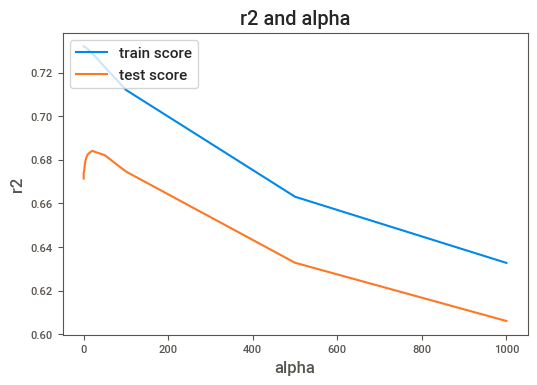

In [788]:
#Ridge (Model-4)
#lets plot mean test and mean train score with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.plot(cv_results["param_alpha"],cv_results["mean_train_score"])
plt.plot(cv_results["param_alpha"],cv_results["mean_test_score"])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [789]:
#Ridge (Model  4)
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.000651  , -0.04551844, -0.00907277,  0.00900686,  0.00266358,
       -0.00831096,  0.00292145,  0.01062881,  0.01120295,  0.00663211,
       -0.00286146,  0.0453279 ,  0.00177402,  0.00213874,  0.03371206,
        0.00520726,  0.00202169,  0.04025928, -0.00058529,  0.01261196,
       -0.02011374,  0.04193934, -0.02692686, -0.01214883, -0.00267114,
        0.09014167,  0.20705483,  0.12931262,  0.02061045,  0.00541908,
       -0.00929074, -0.03018712, -0.01901471,  0.00296842, -0.02853722,
        0.0466782 , -0.02605125,  0.00346386, -0.01074122, -0.00148681,
        0.00101445])

In [790]:
#Ridge (Model 4)
y_train_pred=ridge.predict(X_train)
metric2=[]
r2_train_lr=r2_score(y_train, y_train_pred)
print(r2_train_lr)
metric2.append(r2_train_lr)

y_test_pred=ridge.predict(X_test)
r2_test_lr=r2_score(y_test, y_test_pred)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr=np.sum(np.square(y_train-y_train_pred))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr=np.sum(np.square(y_test-y_test_pred))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr=mean_squared_error(y_train, y_train_pred)
print(mse_train_lr)
metric2.append(mse_train_lr)

mse_test_lr=mean_squared_error(y_test, y_test_pred)
print(mse_test_lr)
metric2.append(mse_test_lr)

0.7254367597479136
0.7117448601142755
42.766097938244656
22.19625860482509
0.04188648182002415
0.05067638950873308


In [791]:
#Ridge (Model 4)
# Ridge model parameters
model_parameters = list(sorted(ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 25.002),
 ('MSSubClass', -0.046),
 ('MSZoning', -0.03),
 ('LotArea', -0.029),
 ('Street', -0.027),
 ('Alley', -0.026),
 ('LotShape', -0.02),
 ('LandContour', -0.019),
 ('Utilities', -0.012),
 ('LotConfig', -0.011),
 ('LandSlope', -0.009),
 ('Neighborhood', -0.009),
 ('Condition1', -0.008),
 ('Condition2', -0.003),
 ('BldgType', -0.003),
 ('HouseStyle', -0.001),
 ('OverallQual', -0.001),
 ('OverallCond', -0.001),
 ('YearBuilt', 0.001),
 ('YearRemodAdd', 0.002),
 ('RoofStyle', 0.002),
 ('RoofMatl', 0.002),
 ('Exterior1st', 0.003),
 ('Exterior2nd', 0.003),
 ('MasVnrType', 0.003),
 ('MasVnrArea', 0.003),
 ('ExterQual', 0.005),
 ('ExterCond', 0.005),
 ('Foundation', 0.007),
 ('BsmtQual', 0.009),
 ('BsmtCond', 0.011),
 ('BsmtExposure', 0.011),
 ('BsmtFinType1', 0.013),
 ('BsmtFinSF1', 0.021),
 ('BsmtFinType2', 0.034),
 ('BsmtFinSF2', 0.04),
 ('BsmtUnfSF', 0.042),
 ('TotalBsmtSF', 0.045),
 ('Heating', 0.047),
 ('HeatingQC', 0.09),
 ('CentralAir', 0.129),
 ('Electrical', 0.207)]

In [792]:
#Ridge (Model 4)
# Top 5 Variable using ridge
model_parameters = list((ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
coef_list=list((zip(cols, model_parameters)))
coef_df=pd.DataFrame(coef_list,columns=["Features","Values"])
top5ridge=coef_df.loc[coef_df["Values"]>=0.045]
top5ridge.sort_values(by="Values",ascending=False)

,Features,Values
0,constant,25.002
27,FullBath,0.207
28,HalfBath,0.129
26,CentralAir,0.090
36,PavedDrive,0.047
12,OverallCond,0.045


In [793]:
# Applying Lasso (Model 4)
#If alpha=0 then overfitting [Unregularised Model]
#Higher the alpha more the regularization more the underfitting
#Lower the alpha lesser the regularization more the overfitting
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.3, 0.5,
                                   0.7, 1.0, 3.0, 5.0, 7.0, 10.0, 20, 50, 100,
                                   500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [794]:
#Lasso (Model 4)
print(model_cv.best_params_)

{'alpha': 0.001}


In [795]:
#Lasso (Model 4)
cv_result=pd.DataFrame(model_cv.cv_results_)
cv_result[["param_alpha","mean_test_score","mean_train_score"]]

,param_alpha,mean_test_score,mean_train_score
0,0.0001,-0.165753,-0.155050
1,0.001,-0.164142,-0.155116
2,0.01,-0.165603,-0.159354
3,0.05,-0.203057,-0.200171
4,0.1,-0.216794,-0.215672
5,0.3,-0.219204,-0.218419
6,0.5,-0.222770,-0.222050
7,0.7,-0.226815,-0.226163
8,1.0,-0.228732,-0.227852
9,3.0,-0.251957,-0.251106


In [796]:
#Lasso (Model 4)
alpha = .001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-0.00080066, -0.04515083, -0.        ,  0.00867302,  0.00100242,
       -0.00788088,  0.        ,  0.01054324,  0.        ,  0.        ,
       -0.00230079,  0.04436522,  0.00157226,  0.00202283,  0.03303982,
        0.00522558,  0.00213649,  0.03911414, -0.        ,  0.01029898,
       -0.01960487,  0.04269027, -0.02716089, -0.01151657, -0.00207375,
        0.10724825,  0.22886173,  0.13989189,  0.        ,  0.0049923 ,
       -0.00802038, -0.03004761, -0.01528496,  0.        , -0.02573295,
        0.04453504, -0.        ,  0.00344124, -0.01008775, -0.        ,
        0.00044996])

In [797]:
#Lasso (Model 4)
y_train_pred=lasso.predict(X_train)
metric3=[]
r2_train_lr=r2_score(y_train, y_train_pred)
print(r2_train_lr)
metric3.append(r2_train_lr)

y_test_pred=lasso.predict(X_test)
r2_test_lr=r2_score(y_test, y_test_pred)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr=np.sum(np.square(y_train-y_train_pred))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr=np.sum(np.square(y_test-y_test_pred))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr=mean_squared_error(y_train, y_train_pred)
print(mse_train_lr)
metric3.append(mse_train_lr)

mse_test_lr=mean_squared_error(y_test, y_test_pred)
print(mse_test_lr)
metric3.append(mse_test_lr)

0.7259604227542482
0.717280385116226
42.68453194494206
21.770011411087353
0.04180659348182376
0.049703222399742814


In [798]:
#Lasso (Model 4)
# Top 5 Variable using Lasso
model_parameters = list((lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
coef_list=list((zip(cols, model_parameters)))
coef_df=pd.DataFrame(coef_list,columns=["Features","Values"])
top5lasso=coef_df.loc[coef_df["Values"]>=0.044]
top5lasso.sort_values(by="Values",ascending=False)

,Features,Values
0,constant,24.316
27,FullBath,0.229
28,HalfBath,0.140
26,CentralAir,0.107
36,PavedDrive,0.045
12,OverallCond,0.044


In [799]:
#Summary of Linear Regression, Ridge Lasso (Model 4)
lr_table={'Metric':['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)'
                    ,'MSE (Train)','MSE (Test)'], 'Linear Regression':metric}

lr_metric=pd.DataFrame(lr_table,columns=['Metric'])

rg_metric=pd.DataFrame(metric2,columns=['Ridge Regression'])
ls_metric=pd.DataFrame(metric3,columns=['Lasso Regression'])

final_metric=pd.concat([lr_metric,rg_metric,ls_metric],axis=1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.725437,0.725960
1,R2 Score (Test),0.711745,0.717280
2,RSS (Train),42.766098,42.684532
3,RSS (Test),22.196259,21.770011
4,MSE (Train),0.041886,0.041807
5,MSE (Test),0.050676,0.049703
